In [ ]:
# Import the relevant libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.datasets import load_wine
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_digits

import seaborn as sns; sns.set()

In [ ]:
#@title Create values for Neural Network analysis

layerSize1 = 91 # @param {type:"slider", min:0, max:1000, step:1}
layerSize2 = 80 # @param {type:"slider", min:0, max:1000, step:1}
layerSize3 = 87 # @param {type:"slider", min:0, max:1000, step:1}
activation = "relu" # @param ["relu", "tanh", "logistic", "identity"]
solver = "lbfgs" # @param ["adam", "sgd", "lbfgs"]
maxIterations = 1823 # @param {type:"slider", min:10, max:3000, step:1}

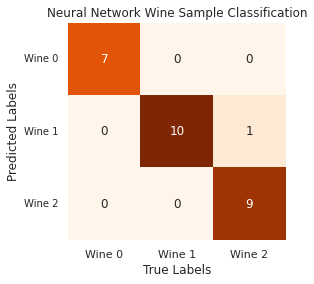


Neural Network Classifier Wine Accuracy Results:
------------------------------------------------
Accuracy: 0.96



In [ ]:
# @title Neural Network Wine Analysis

# Load wine data
X_wine, y_wine = load_wine(return_X_y = True)

# Split the data
X_train, X_remain, y_train, y_remain = train_test_split(X_wine, y_wine, test_size = 0.3)
X_test, X_val, y_test, y_val = train_test_split(X_remain, y_remain, test_size = 0.5)

# Training data
X_final_train = np.concatenate((X_train, X_val))
y_final_train = np.concatenate((y_train, y_val))

# Neural Network object
Wine_Neural_Network = MLPClassifier(hidden_layer_sizes = (layerSize1,layerSize2, layerSize3), 
                                    activation = activation, solver = solver, max_iter = maxIterations)

# Train and Predict
Wine_Neural_Network.fit(X_final_train, y_final_train)
y_final_hat = Wine_Neural_Network.predict(X_test)

# Create confusion matrix
Wine_Confusion_Matrix = confusion_matrix(y_test, y_final_hat)

plt.figure(0)
ax = sns.heatmap(Wine_Confusion_Matrix.T, cmap = "Oranges", 
                  square = True, annot = True, fmt = 'd', cbar = False)

ax.set_xticklabels(("Wine 0","Wine 1","Wine 2"))
ax.set_yticklabels(("Wine 0","Wine 1","Wine 2"), rotation = 0, \
                   fontsize = "10", va = "center")
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
plt.title("Neural Network Wine Sample Classification")
plt.show()

# Calculate and print the accuracy of the model
accuracy = round(accuracy_score(y_test,y_final_hat),2)

print("\nNeural Network Classifier Wine Accuracy Results:\n"
      "------------------------------------------------")
print(f"Accuracy: {accuracy}\n")

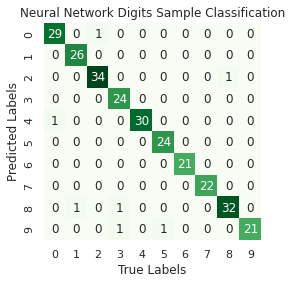


Neural Network Classifier Digits Accuracy Results:
--------------------------------------------------
Accuracy: 0.97



In [ ]:
# @title Neural Network Digit Analysis

# Load Digit data
X_digits, y_digits = load_digits(return_X_y = True)

# Split the data
X_train, X_remain, y_train, y_remain = train_test_split(X_digits, y_digits, test_size = 0.3)
X_test, X_val, y_test, y_val = train_test_split(X_remain, y_remain, test_size = 0.5)

# Training data
X_final_train = np.concatenate((X_train, X_val))
y_final_train = np.concatenate((y_train, y_val))

# Neural Network object
Digits_Neural_Network = MLPClassifier(hidden_layer_sizes = (layerSize1,layerSize2, layerSize3), 
                                    activation = activation, solver = solver, max_iter = maxIterations)

# Train and Predict
Digits_Neural_Network.fit(X_final_train, y_final_train)
y_final_hat = Digits_Neural_Network.predict(X_test)

# Create confusion matrix
Digits_Confusion_Matrix = confusion_matrix(y_test, y_final_hat)

plt.figure(0)
ax = sns.heatmap(Digits_Confusion_Matrix.T, cmap = "Greens", 
                  square = True, annot = True, fmt = 'd', cbar = False)

#ax.set_xticklabels(("Wine 0","Wine 1","Wine 2"))
#ax.set_yticklabels(("Wine 0","Wine 1","Wine 2"), rotation = 0, \
                   #fontsize = "10", va = "center")
plt.xlabel("True Labels")
plt.ylabel("Predicted Labels")
plt.title("Neural Network Digits Sample Classification")
plt.show()

# Calculate and print the accuracy of the model
accuracy = round(accuracy_score(y_test,y_final_hat),2)

print("\nNeural Network Classifier Digits Accuracy Results:\n"
      "--------------------------------------------------")
print(f"Accuracy: {accuracy}\n")